In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from mitgcmdata import MITgcmmodel
from jmd95 import eos
import xray
import xgcm

%matplotlib inline
plt.rcParams['image.origin'] = 'bottom'
plt.rcParams['figure.figsize'] = (16,8)


In [5]:
ddir = '/data/scratch/rpa/SOSE/run_np240_layers'

iters = range(2920, 207320+1, 2920)
#iters = range(48,120720+1,96)
ds = xray.decode_cf(xgcm.open_mdsdataset(ddir, iters, prefix=['DiagSurf'],
                             deltaT=900, ref_date='2005-01-01 00:00:00', calendar='gregorian'))
ds

/home/rpa/xgcm/xgcm/mdsxray.py:272: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/rpa/xgcm/xgcm/mdsxray.py:604: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the level, so the variable is skipped: THETA
  "skipped: " + k)
/home/rpa/xgcm/xgcm/mdsxray.py:604: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the level, so the variable is skipped: SALT
  "skipped: " + k)
/home/rpa/xgcm/xgcm/mdsxray.py:604: UserWarning: Shape of variable data is not compatible with expected number of dimensions. This can arise if the 'levels' option is used in data.diagnostics. Right now we have no way to infer the level, so the variable is skipped: WTHMASS
  "

<xray.Dataset>
Dimensions:               (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, layers1RHO_bounds: 70, layers1RHO_center: 69, layers1RHO_interface: 68, time: 71)
Coordinates:
    YC                    (Y, X) float32 -77.875 -77.875 -77.875 -77.875 ...
    YG                    (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 ...
    rA                    (Y, X) float32 7.21182e+07 7.21182e+07 7.21182e+07 ...
  * Xp1                   (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 ...
    PHrefC                (Z) float32 49.05 152.055 264.87 387.495 519.93 ...
    PHrefF                (Zp1) float32 0.0 98.1 206.01 323.73 451.26 588.6 ...
    dxG                   (Yp1, X) float32 3865.71 3865.71 3865.71 3865.71 ...
    dxC                   (Y, Xp1) float32 3892.06 3892.06 3892.06 3892.06 ...
  * Zl                    (Zl) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 ...
  * Yp1                   (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 ...
  * Zp1  

In [7]:
print 'Area of the Southern Ocean South of 50S', \
    (ds.rA * ds.HFacC[0]).where(ds.YC < -50).sum().values

Area of the Southern Ocean South of 50S 4.5481405186e+13


In [4]:
print ds.SIempmr.attrs
print ds.SIatmFW.attrs


OrderedDict([('units', 'kg/m^2/s'), ('description', 'Ocean surface freshwater flux, > 0 increases salt')])
OrderedDict([('units', 'kg/m^2/s'), ('description', 'Net freshwater flux from atmosphere & land (+=down)')])


In [5]:
ds_month = ds.groupby('time.month').mean(dim='time')
ds_freeze = ds_month.sel(month=slice(3,11)).mean(dim='month')
ds_freeze

<xray.Dataset>
Dimensions:               (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, layers1RHO_bounds: 70, layers1RHO_center: 69, layers1RHO_interface: 68)
Coordinates:
    YC                    (Y, X) float32 -77.875 -77.875 -77.875 -77.875 ...
    YG                    (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 ...
    rA                    (Y, X) float32 7.21182e+07 7.21182e+07 7.21182e+07 ...
  * Xp1                   (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 ...
    PHrefC                (Z) float32 49.05 152.055 264.87 387.495 519.93 ...
    PHrefF                (Zp1) float32 0.0 98.1 206.01 323.73 451.26 588.6 ...
    dxG                   (Yp1, X) float32 3865.71 3865.71 3865.71 3865.71 ...
    dxC                   (Y, Xp1) float32 3892.06 3892.06 3892.06 3892.06 ...
  * Zl                    (Zl) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 ...
  * Yp1                   (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 ...
  * Zp1            

In [6]:
ds_month_era = ds.isel(time=slice(36,None)).groupby('time.month').mean(dim='time')
ds_freeze_era = ds_month_era.sel(month=slice(3,11)).mean(dim='month')

In [50]:
from mpl_toolkits.basemap import Basemap
def southern_ocean_pcolormesh(lon, lat, data, boundinglat=-65, lw=0.25,
                              ax=None, labels=[1,1,0,1], **kwargs):
    """Plot something in the southern ocean."""
    
    m = Basemap(projection='spstere',boundinglat=boundinglat,lon_0=180, ax=ax)
    #m.drawcoastlines()
    m.fillcontinents(color='0.5',lake_color='0.55')
    # draw parallels and meridians.
    m.drawparallels(np.arange(-80.,81.,5.), linewidth=lw)
    m.drawmeridians(np.arange(-180.,181.,20.), labels=labels, linewidth=lw)
    m.drawmapboundary(fill_color='w')
    #x, y = m(nc.variables['TLON'][:], nc.variables['TLAT'][:])
    return m.pcolormesh(lon, lat, data, latlon=True, **kwargs), m

def southern_ocean_contourf(lon, lat, data, clevs, boundinglat=-65, lw=0.25, 
                            ax=None, labels=[1,1,0,1], land=True, **kwargs):
    """Plot something in the southern ocean."""
    
    m = Basemap(projection='spstere',boundinglat=boundinglat,lon_0=180, ax=ax)
    #m.drawcoastlines()
    if land:
        m.fillcontinents(color='0.5',lake_color='0.55')
    else:
        m.drawcoastlines()
    # draw parallels and meridians.
    m.drawparallels(np.arange(-80.,81.,5.), linewidth=lw)
    m.drawmeridians(np.arange(-180.,181.,20.), labels=labels, linewidth=lw)
    m.drawmapboundary(fill_color='w')
    #x, y = m(nc.variables['TLON'][:], nc.variables['TLAT'][:])
    return m.contourf(lon, lat, data, clevs, latlon=True, **kwargs), m



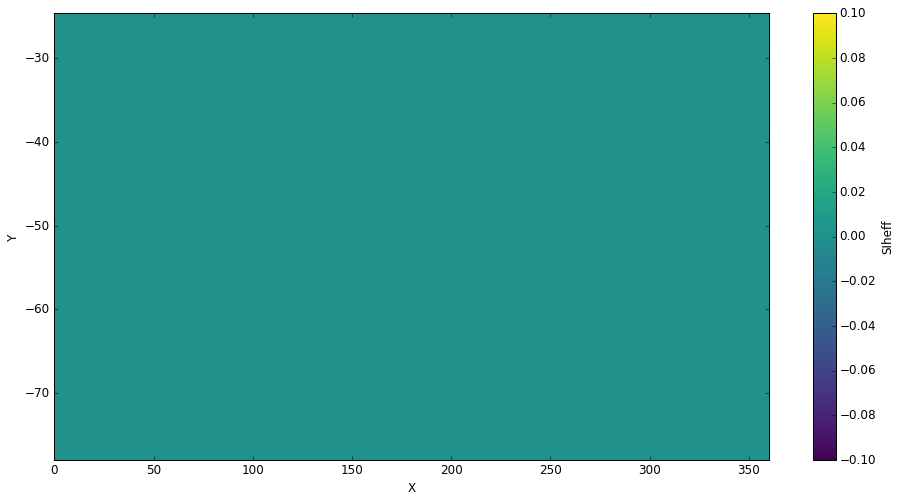

In [12]:
mask.plot()

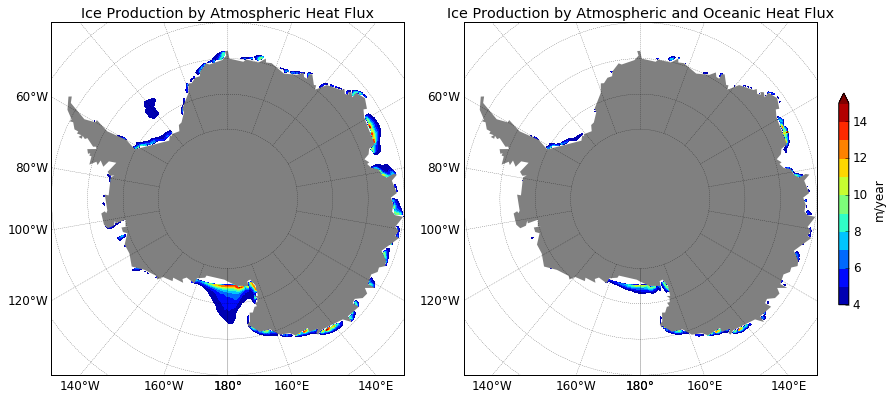

In [38]:
year = 24*60*60*365
lon, lat = np.meshgrid(ds.X.values, ds.Y.values)

mask = (ds_freeze.SIheff>0.2) | (ds_freeze.SIheff<=0.0)

plt.rcParams['font.size'] = 12

fig = plt.figure(figsize=(13,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03, hspace=0.01)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, (year*ds_freeze.SIdHbATC), 
                                 #np.arange(-16,17),
                                 np.arange(4,16),
                                 labels=[1,0,0,1],
                               ax=ax, extend='max', cmap='jet')
ax.set_title('Ice Production by Atmospheric Heat Flux')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, year*(ds_freeze.SIdHbATC + ds_freeze.SIdHbOCN), 
                                 #np.arange(-16,17),
                                 np.arange(4,16),
                                 labels=[1,0,0,1],
                               ax=ax, extend='max', cmap='jet')
ax.set_title('Ice Production by Atmospheric and Oceanic Heat Flux')

cb = fig.colorbar(pc, shrink=0.6)

cb.set_label('m/year')

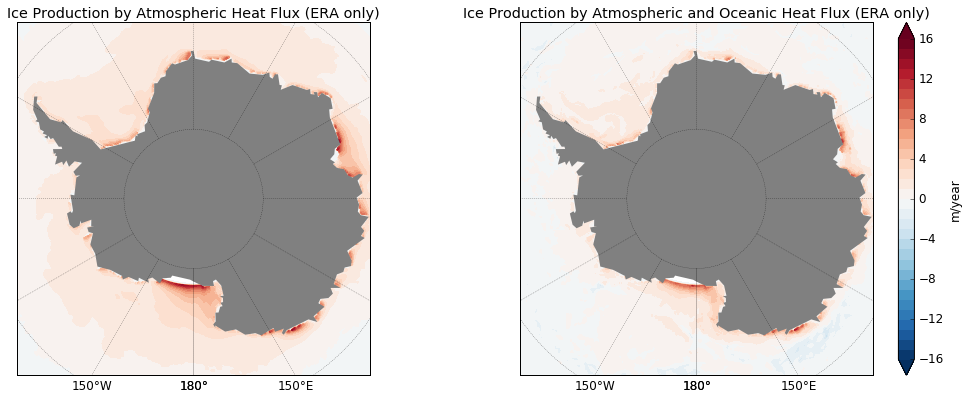

In [7]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, (year*ds_freeze_era.SIdHbATC), 
                                 np.arange(-16,17),
                                 labels=[0,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')
ax.set_title('Ice Production by Atmospheric Heat Flux (ERA only)')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, year*(ds_freeze_era.SIdHbATC + ds_freeze_era.SIdHbOCN), 
                                 np.arange(-16,17),
                                 labels=[0,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')
ax.set_title('Ice Production by Atmospheric and Oceanic Heat Flux (ERA only)')

cb = fig.colorbar(pc)

cb.set_label('m/year')

In [15]:
ds_freeze.SFLUX.attrs

OrderedDict()

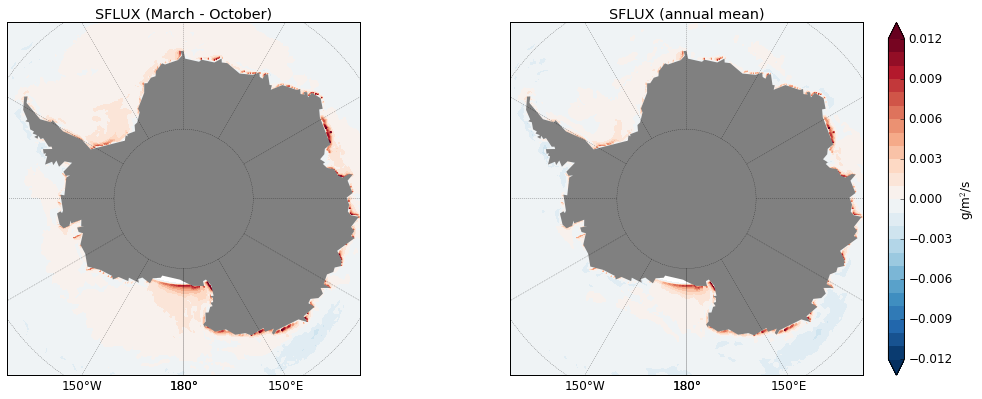

In [22]:
year = 24*60*60*365
lon, lat = np.meshgrid(ds.X.values, ds.Y.values)

plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, (ds_freeze.SFLUX), 
                                 np.arange(-12,13)*1e-3,
                                 labels=[0,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')

plt.title('SFLUX (March - October)')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, SFLUX_annmean, 
                                 np.arange(-12,13)*1e-3,
                                 labels=[0,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')

plt.title('SFLUX (annual mean)')
cb = fig.colorbar(pc)
cb.set_label(r'g/m$^2$/s')

In [52]:
SIempmr_mean = ds.SIempmr.mean(dim='time')
SIatmFW_mean = ds.SIatmFW.mean(dim='time')

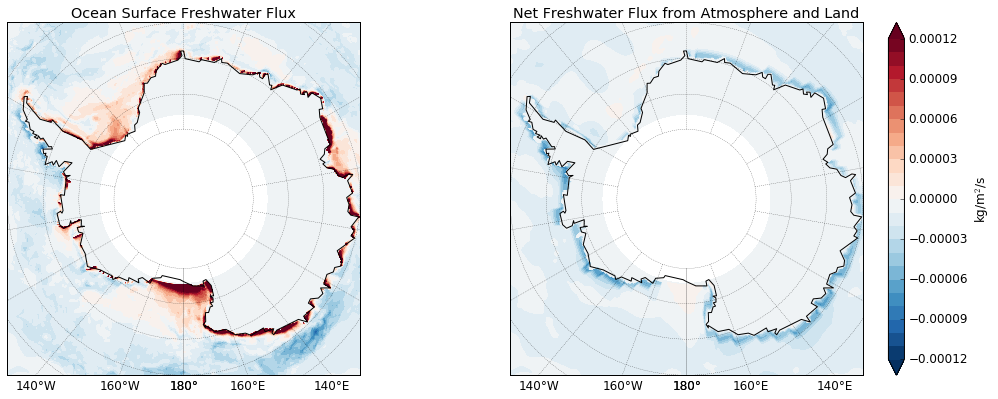

In [53]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, SIempmr_mean,
                                 np.arange(-12,13)*1e-5,
                                 labels=[0,0,0,1], land=False,
                               ax=ax, extend='both', cmap='RdBu_r')

plt.title('Ocean Surface Freshwater Flux')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, -SIatmFW_mean,
                                 np.arange(-12,13)*1e-5,
                                 labels=[0,0,0,1], land=False,
                               ax=ax, extend='both', cmap='RdBu_r')

plt.title('Net Freshwater Flux from Atmosphere and Land')
cb = fig.colorbar(pc)
cb.set_label(r'kg/m$^2$/s')

In [16]:
ds.SFLUX.attrs

OrderedDict([('units', 'g/m^2/s'),
             ('description',
              'total salt flux (match salt-content variations), >0 increases salt')])

In [20]:
SFLUX_annmean = ds.SFLUX.mean(dim='time').load()

In [41]:
ds_TS = xray.decode_cf(xgcm.open_mdsdataset(ddir, range(480,210240+1,480), prefix=['SOstt_5d'],
                             deltaT=900, ref_date='2005-01-01 00:00:00', calendar='gregorian'))


In [42]:
ds_TS

<xray.Dataset>
Dimensions:               (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, layers1RHO_bounds: 70, layers1RHO_center: 69, layers1RHO_interface: 68, time: 438)
Coordinates:
    YC                    (Y, X) float32 -77.875 -77.875 -77.875 -77.875 ...
    YG                    (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 ...
    rA                    (Y, X) float32 7.21182e+07 7.21182e+07 7.21182e+07 ...
  * Xp1                   (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 ...
    PHrefC                (Z) float32 49.05 152.055 264.87 387.495 519.93 ...
    PHrefF                (Zp1) float32 0.0 98.1 206.01 323.73 451.26 588.6 ...
    dxG                   (Yp1, X) float32 3865.71 3865.71 3865.71 3865.71 ...
    dxC                   (Y, Xp1) float32 3892.06 3892.06 3892.06 3892.06 ...
  * Zl                    (Zl) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 ...
  * Yp1                   (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 ...
  * Zp1 

In [44]:
th_mean = ds_TS.THETA.mean(dim='time').load()

In [45]:
salt_mean = ds_TS.SALT.mean(dim='time').load()

In [46]:
mask = (ds_TS.HFacC.values == 0.)
botmask = ~mask[:-1] & (mask[1:])
botmask = np.pad(botmask, ((0,1),(0,0),(0,0)), mode='constant')

In [47]:
th_bot = th_mean.where(botmask).mean(dim='Z')
salt_bot = salt_mean.where(botmask).mean(dim='Z')

th0_bot = ds_TS.THETA[0].where(botmask).mean(dim='Z')
salt0_bot = ds_TS.SALT[0].where(botmask).mean(dim='Z')

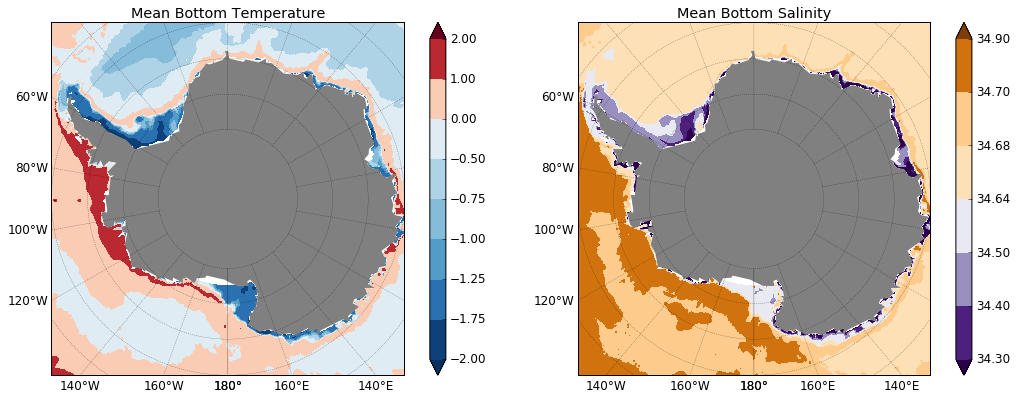

In [48]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, th_bot, 
                                 [-2,-1.75,-1.25,-1,-0.75,-0.5,0,1,2],
                                 labels=[1,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')
plt.colorbar(pc)
plt.title('Mean Bottom Temperature')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, salt_bot, 
                                 [34.3,34.4,34.5,34.64,34.68,34.7,34.9],
                                 labels=[1,0,0,1],
                               ax=ax, extend='both', cmap='PuOr_r')
plt.colorbar(pc)
plt.title('Mean Bottom Salinity')


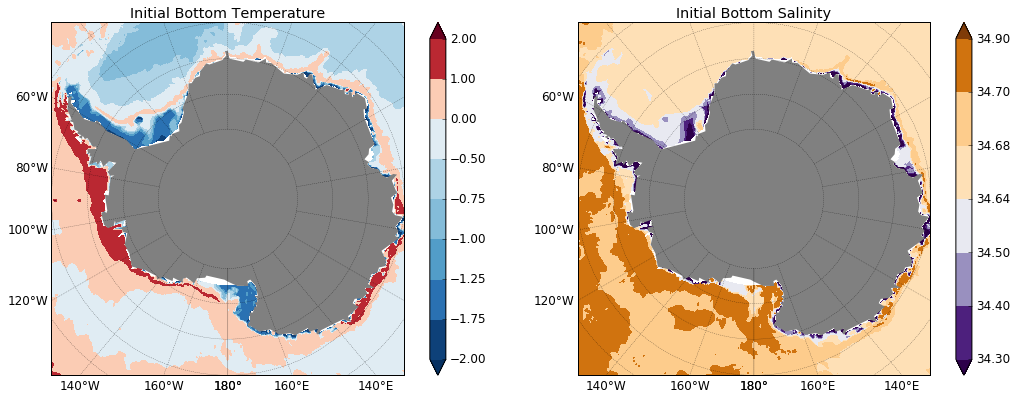

In [49]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.2, wspace=0.03)

ax = fig.add_subplot(121)
pc, bm = southern_ocean_contourf(lon, lat, th0_bot, 
                                 [-2,-1.75,-1.25,-1,-0.75,-0.5,0,1,2],
                                 labels=[1,0,0,1],
                               ax=ax, extend='both', cmap='RdBu_r')
plt.colorbar(pc)
plt.title('Initial Bottom Temperature')

ax = fig.add_subplot(122)
pc, bm = southern_ocean_contourf(lon, lat, salt0_bot, 
                                 [34.3,34.4,34.5,34.64,34.68,34.7,34.9],
                                 labels=[1,0,0,1],
                               ax=ax, extend='both', cmap='PuOr_r')
plt.colorbar(pc)
plt.title('Initial Bottom Salinity')


In [99]:
#point = ds_TS.sel_points(X=[305], Y=[-73], method='nearest')
point = ds_TS.sel(X=300, method='nearest').sel(Y=-75, method='nearest')
point_flux = ds.sel(X=300, method='nearest').sel(Y=-75, method='nearest')

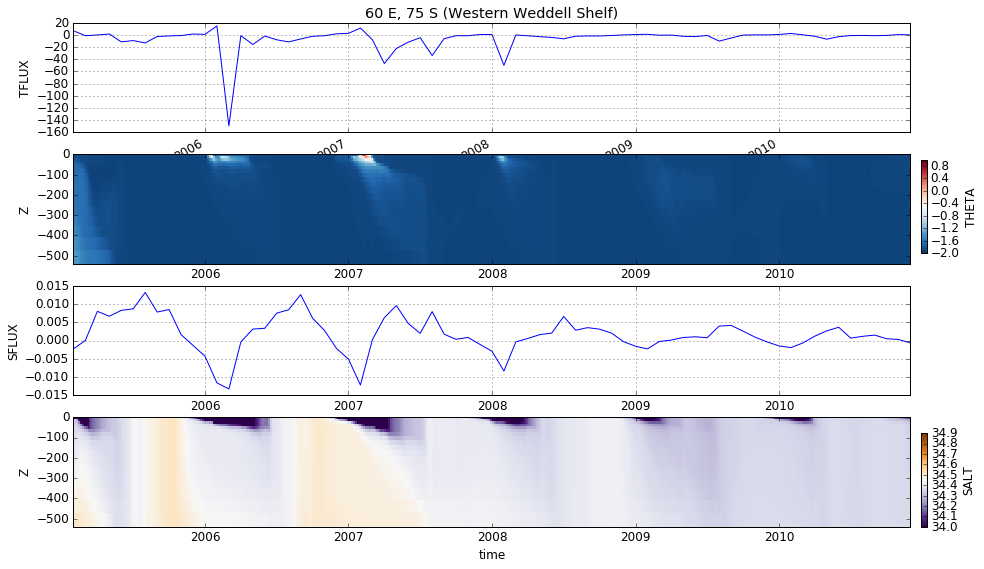

In [222]:
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(411)
point_flux.TFLUX.plot()
plt.xlim([point_flux.time[0].values, point_flux.time[-1].values])
plt.grid()
plt.title('60 E, 75 S (Western Weddell Shelf)')

ax2= plt.subplot(412)
pc1 = point.THETA.sel(Z=slice(0,-550)).T.plot(vmin=-2,vmax=1, cmap='RdBu_r', add_colorbar=False)
plt.xlim([point_flux.time[0].values, point_flux.time[-1].values])
plt.title('')
cb1 = plt.colorbar(pc1, cax=plt.axes([0.91,0.58,0.005,0.13]))
cb1.set_label('THETA')


#ax1.set_position(Bbox([nb[:2],nb[2:]]))
ax3= plt.subplot(413)
point_flux.SFLUX.plot()
plt.xlim([point_flux.time[0].values, point_flux.time[-1].values])
plt.title('')
plt.grid()

ax4 = plt.subplot(414)
pc2 = point.SALT.sel(Z=slice(0,-550)).T.plot(vmin=34,vmax=34.9,cmap='PuOr_r', add_colorbar=False)
plt.title('')
plt.xlim([point_flux.time[0].values, point_flux.time[-1].values])
cb2 = plt.colorbar(pc2, cax=plt.axes([0.91,0.2,0.005,0.13]))
cb2.set_label('SALT')


In [54]:
heff_mean = ds.SIheff.mean(dim='time')
snow_mean = ds.SIhsnow.mean(dim='time')

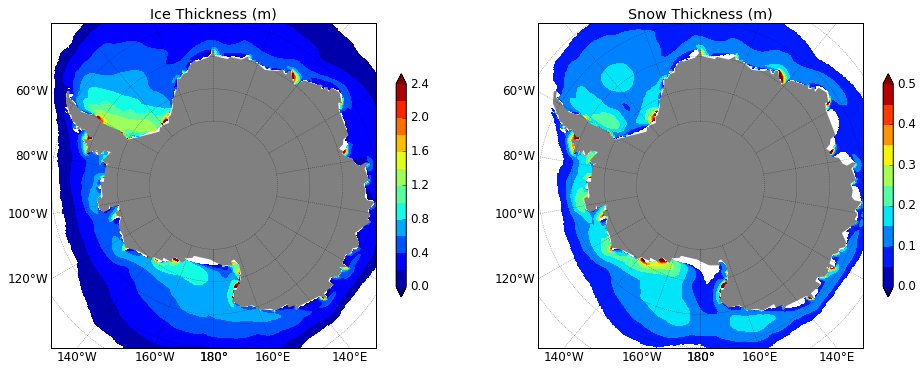

In [55]:
fig, [ax1, ax2] = plt.subplots(ncols=2)
pc, bm = southern_ocean_contourf(lon, lat, np.ma.masked_less(heff_mean,0.05), np.arange(0,2.5,0.2),
                                 labels=[1,0,0,1],
                               ax=ax1, extend='both', cmap='jet')
plt.colorbar(pc, ax=ax1, shrink=0.5)
ax1.set_title('Ice Thickness (m)')

pc, bm = southern_ocean_contourf(lon, lat, np.ma.masked_less(snow_mean,0.05), np.arange(0,.501,0.05),
                                 labels=[1,0,0,1],
                               ax=ax2, extend='both', cmap='jet')
plt.colorbar(pc, ax=ax2, shrink=0.5)
ax2.set_title('Snow Thickness (m)')



In [ ]:
ds.SI